# Brand Analysis

In this jupyter notebook the idea is to analyze how the brands behave in time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

snacks_df = pd.read_csv('./datasets/clean_snacks.csv', dtype={ 'client_id': str }, parse_dates=['date'], date_parser=dateparse)
snacks_df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,324,0,"181,530.00","-32,675.40",0
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,36,0,"20,170.00","-4,437.40",0
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,73200,0,"91,227.00","-20,069.98",0
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,1080,0,"605,100.00","-108,918.43",0
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,TRADICIONAL,NaN,NaN,Superficies Menores,2014-04-01,100,40,"73,280.00","-10,992.00","-29,312.00"


Adding fields that can be useful later

In [76]:
snacks_df['month'] = snacks_df['date'].map(lambda x: x.month)
snacks_df['year'] = snacks_df['date'].map(lambda x: x.year)
snacks_df['yyyymm'] = snacks_df['date'].map(lambda x: x.strftime('%Y%m'))

## What are the top 5 brands that produced more sales?

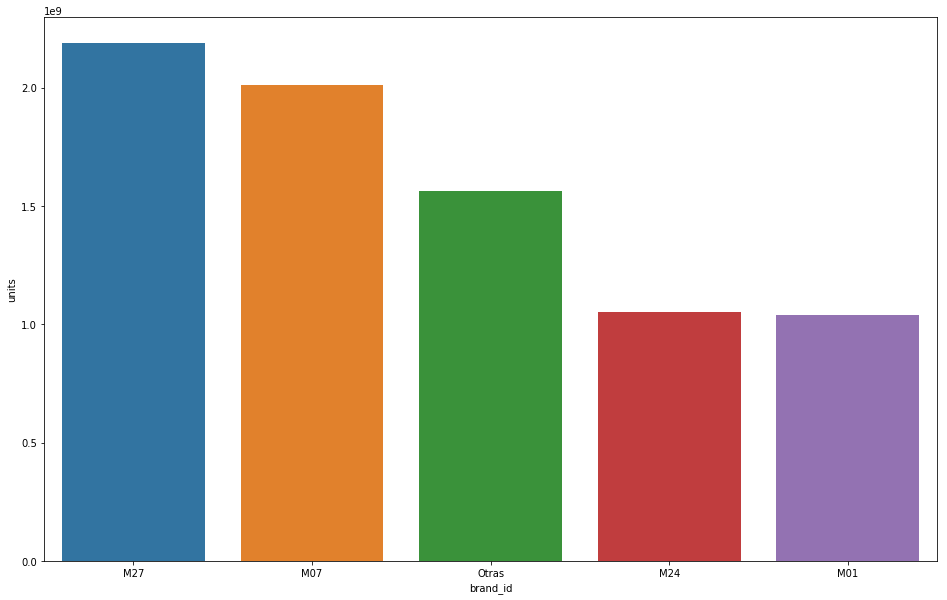

In [78]:
group_brands = snacks_df.groupby('brand_id')['units'].sum().reset_index(name='units').sort_values('units', ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x='brand_id', y='units', data=group_brands.head())

In [79]:
brands = group_brands['brand_id'].head().values
group_products = snacks_df[snacks_df['brand_id'].isin(brands)].groupby(['brand_id', 'category_name'])['units'].count().reset_index(name='count').sort_values('brand_id')

group_products

,brand_id,category_name,count
0,M01,Multiproductos,128
1,M01,Producto de Extrusion,146156
2,M07,Producto a base de Tuberculo,25
3,M07,Producto en Frituras,292878
4,M24,Platanos a base de Harina,41657
5,M27,Otros,70720
6,Otras,Combinaciones Individuales,68
7,Otras,Platanos a base de Harina,8204
8,Otras,Producto de Horno,9165
9,Otras,Producto en Frituras,59


## What are the product types that produce more sales?

[Text(0,0,'Producto en Frituras'),
 Text(0,0,'Otros'),
 Text(0,0,'Producto de Extrusion'),
 Text(0,0,'Platanos a base de Harina'),
 Text(0,0,'Combinaciones Individuales'),
 Text(0,0,'Producto de Horno'),
 Text(0,0,'Producto a base de Platano'),
 Text(0,0,'Producto a base de Tuberculo'),
 Text(0,0,'Multiproductos')]

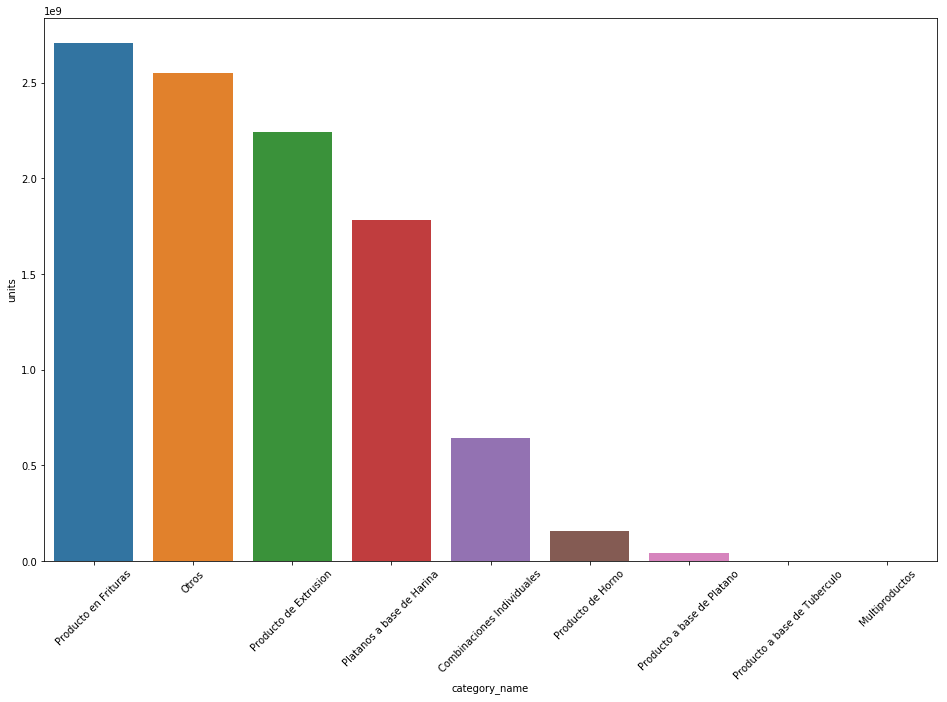

In [80]:
group_category = snacks_df.groupby('category_name')['units'].sum().reset_index(name='units').sort_values('units', ascending=False)

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='category_name', y='units', data=group_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Resume

We found that the products that sales the most are "Producto en frituras" this product is sale by the brand "M07", this is the second brand that sales most.

## What are the top 10 products that sales the most?

In [81]:
product_group = snacks_df.groupby('product_id')['units'].sum().reset_index(name='units')
product_group.head().sort_values('units', ascending=False)

,product_id,units
0,53100002,111264552
1,53100003,45994968
4,53100008,5934816
2,53100004,5431752
3,53100007,2190384


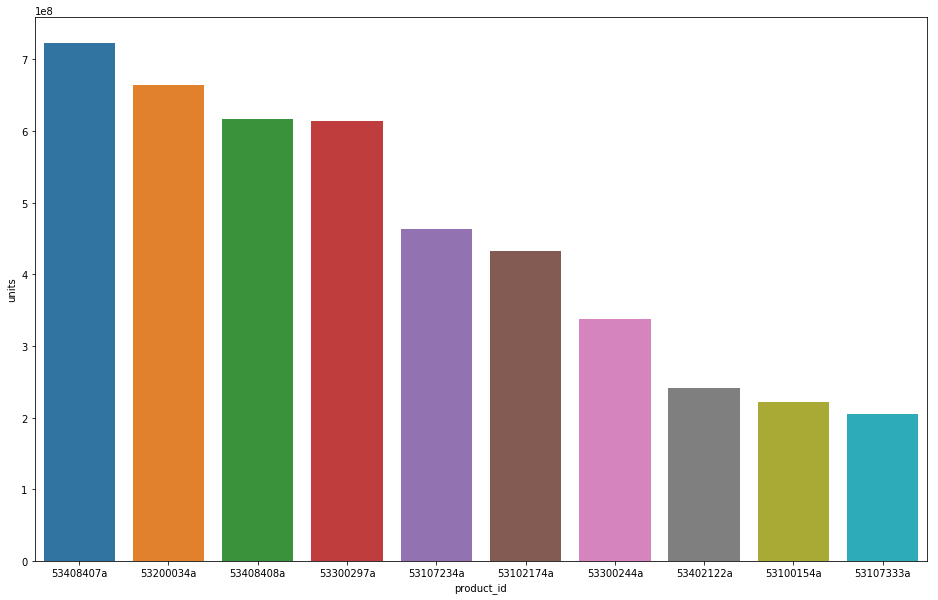

In [82]:
product_group['product_id'] = product_group['product_id'].map(lambda x: str(x) + 'a')
plt.figure(figsize=(16, 10))
sns.barplot(x='product_id', y='units', data=product_group.sort_values('units', ascending=False).head(10))

## In what category are this products?

In [83]:
most_selled_products = product_group.sort_values('units', ascending=False).head(10)['product_id'].map(lambda x: x.replace('a', ''))
most_selled_products

576    53408407
307    53200034
577    53408408
367    53300297
66     53107234
53     53102174
331    53300244
418    53402122
10     53100154
75     53107333
Name: product_id, dtype: object

In [84]:
(snacks_df[snacks_df['product_id'].isin(most_selled_products)]
     .groupby(['category_name', 'product_id'])['units']
     .sum()
     .reset_index()
     .sort_values('units', ascending=False))

,category_name,product_id,units
1,Otros,53408407,722783808
0,Otros,53200034,664473024
2,Otros,53408408,617268960
3,Platanos a base de Harina,53107234,462912120
6,Producto de Extrusion,53102174,433187520
7,Producto de Extrusion,53402122,241083900
5,Producto de Extrusion,53100154,222297600
4,Platanos a base de Harina,53107333,205215768


## What are the behaviour of product types by month

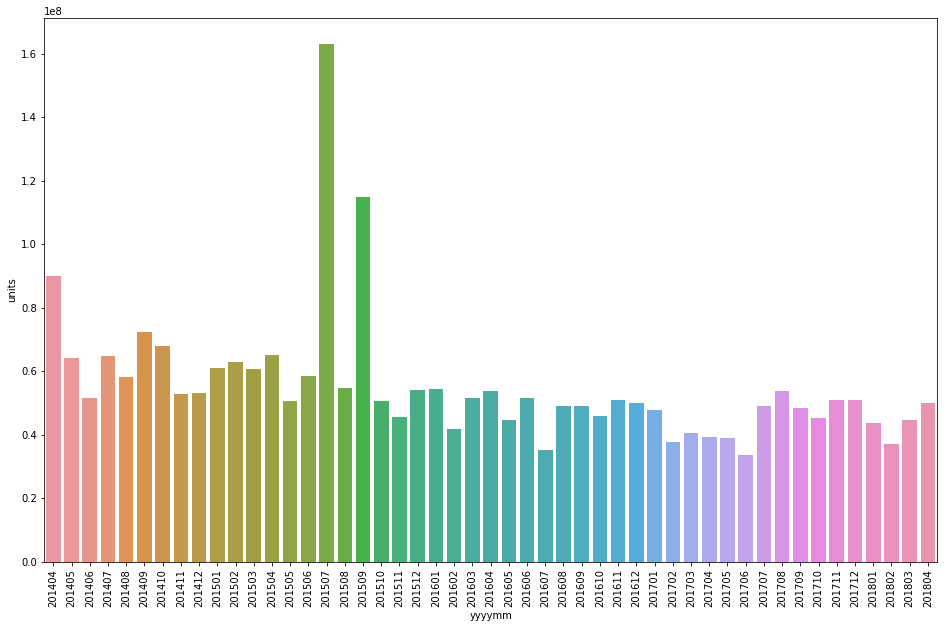

In [95]:
category_name = 'Producto en Frituras'

category_df = snacks_df[snacks_df['category_name'] == category_name]
category_grouping = category_df.groupby('yyyymm')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='yyyymm', y='units', data=category_grouping)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We cannot see any clear pattern, maybe adding the distributor variable in here we can see patterns?

## How is the sales distribution of this `Producto en Frituras`?

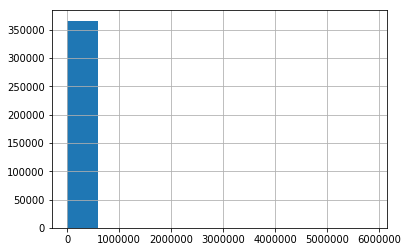

In [97]:
category_df['units'].hist()

## Why are there such high values in the sales?

## What are the top highest sales

In [99]:
category_df['units'].sort_values(ascending = False).head(10)

960701     5855976
1033939    4858848
225099     4814424
10015      4743576
11073      4566024
177809     4123224
1060065    3943296
1001245    3717576
982591     3656376
340475     3331224
Name: units, dtype: int64

We have some sales that are in millions, se we can identify that probably there are two type of buyers, the ones that buys very big quantities, and others that buy normal quantities.

In [115]:
print(f"Mean of the units: {category_df['units'].mean()}")
print(f"Median of the units: {category_df['units'].median()}")

Mean of the units: 7388.801240912989
Median of the units: 240.0


We can see that we have a mean that it is very far from the median, that could be because we have pretty big outliers, why is this happening? can we determine the sales that are causing this?

What are the percentiles of the units data? can we separate big buyers with a percentile value?

In [122]:
quantiles = {}
for i in range(1, 10):
    percentage = i * 10 / 100
    quantiles[str(percentage)] = category_df['units'].quantile(percentage)

quantiles

{'0.1': 20.0,
 '0.2': 60.0,
 '0.3': 80.0,
 '0.4': 144.0,
 '0.5': 240.0,
 '0.6': 360.0,
 '0.7': 720.0,
 '0.8': 1656.0,
 '0.9': 6432.0}

I'm going to choose a quantile in order to separate the data as high buyers and normal buyers.

In [137]:
quantile = '0.8'

In [143]:
big_sales = category_df[category_df['units'] > quantiles[quantile]]
normal_sales = category_df[category_df['units'] <= quantiles[quantile]]

In [144]:
print(f"There are {len(big_sales)} big sales")
print(f"There are {len(normal_sales)} normal sales")

There are 72722 big sales
There are 293460 normal sales


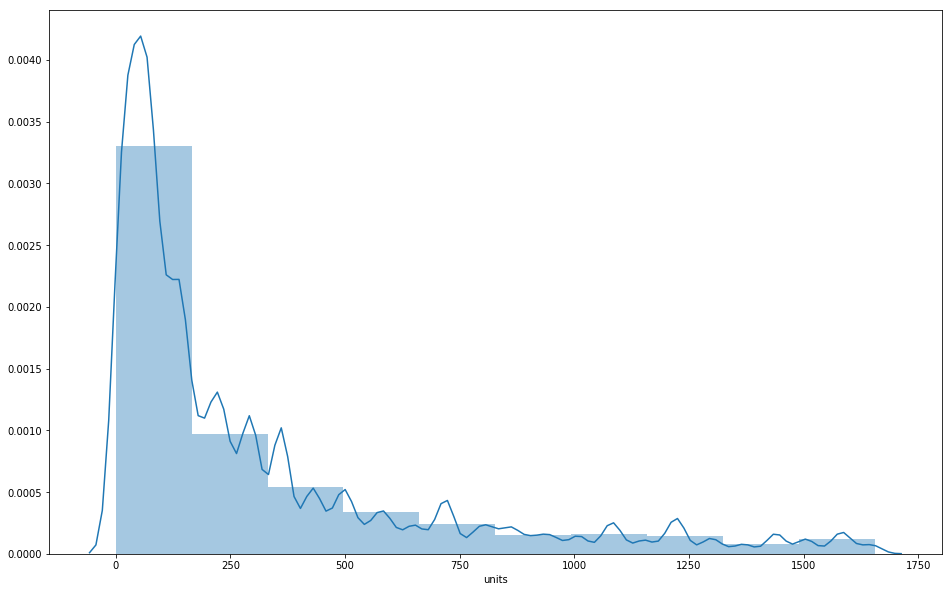

In [158]:
plt.figure(figsize=(16, 10))
sns.distplot(normal_sales['units'], bins=10)

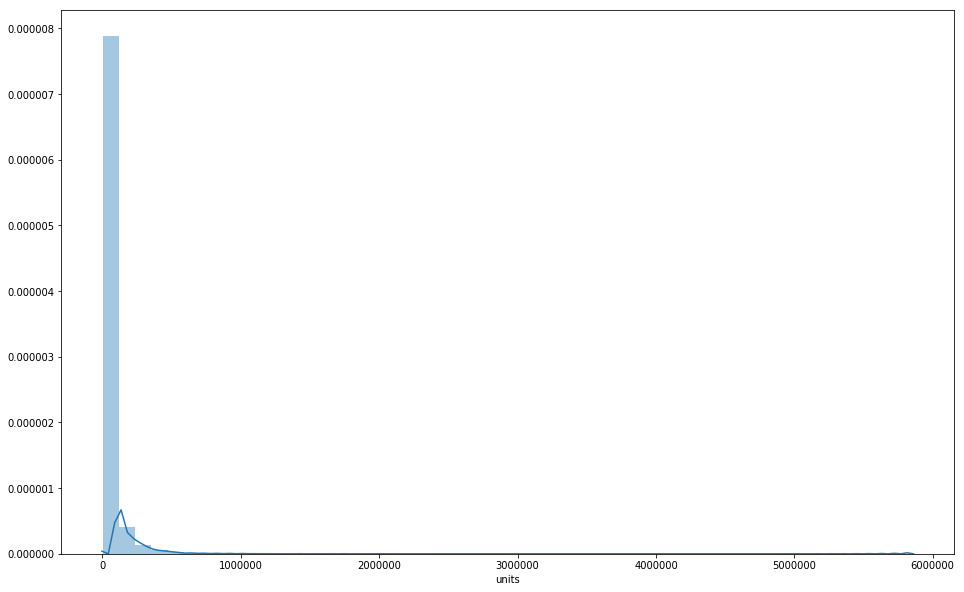

In [147]:
plt.figure(figsize=(16, 10))
sns.distplot(big_sales['units'])

Is still difficult to see what is happening to the big sales as there isn't a clear distribution for them.

Let's do a separate analysis of what is happening with the big sales..

## What are the distributor types that are buying more?

In [165]:
big_sales.groupby('distributor')['units'].sum().reset_index().sort_values('units', ascending=False).head(10)

,distributor,units
7,Tiendas,2326668244
2,Clientes Mayoristas,85528764
3,Grandes Superficies,76086294
6,Superficies Menores,67500984
4,Negocios Esp,47167060
0,Cadenas Medianas,6424560
8,Venta en Calle,6256950
1,Clientes Droguerias,1513468
5,Otros,10224


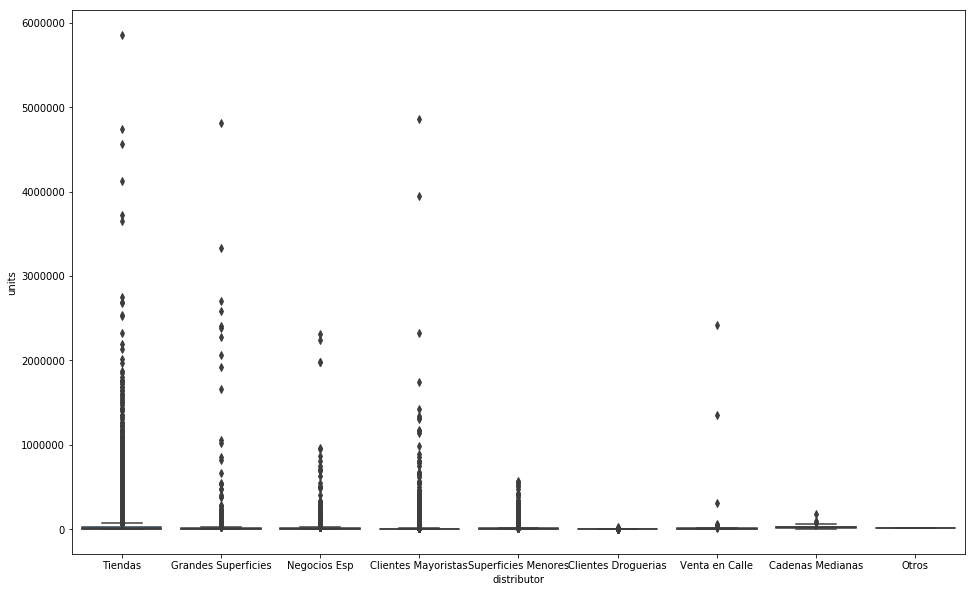

In [173]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='distributor', y='units', data=big_sales)

We can see in this chart that at there are some types of ditributor that generates big sales, and there are other that are more constant in their purchases.

In [177]:
all_distributors = category_df['distributor'].unique()
stable_distributors = ['Superficies Menores', 'Clientes Droguerias', 'Cadenas Medianas', 'Otros']

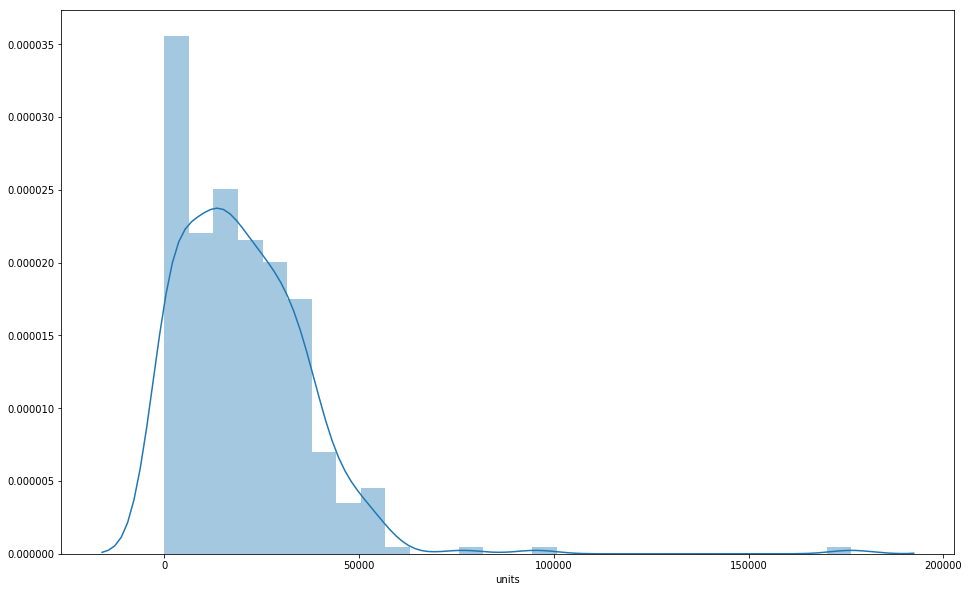

In [183]:
plt.figure(figsize=(16, 10))
sns.distplot(category_df[category_df['distributor'] == stable_distributors[2]]['units'])

## I'm going to set `Tiendas` as the ditributor type that represents the big sales
## Can I see anything that indicates me why this stores are buying such high quantities of product?

In [184]:
big_distributor = 'Tiendas'

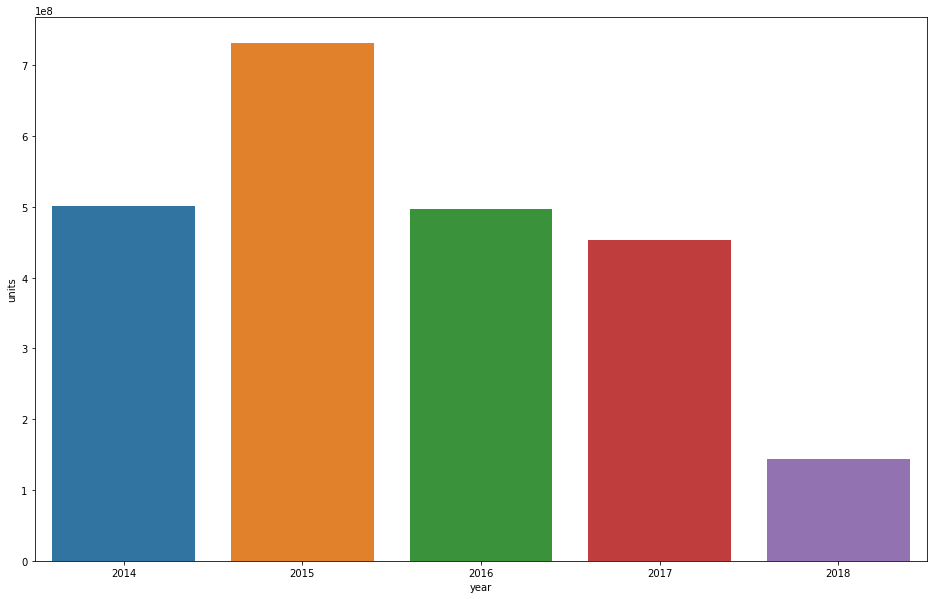

In [189]:
year_group = big_sales[big_sales['distributor'] == big_distributor].groupby('year')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(x='year', y='units', data=year_group)

For year we cannot see any clear pattern, seems to be stable, to have into account that 2014 and 2018 there are not sufficient data so that is reflected having a very low value in 2018

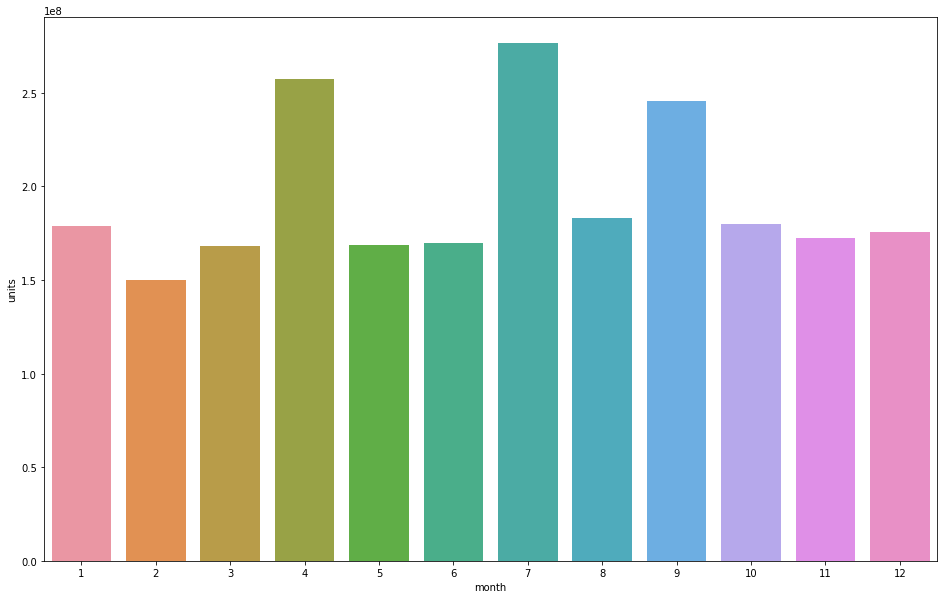

In [192]:
month_group = big_sales[big_sales['distributor'] == big_distributor].groupby('month')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(x='month', y='units', data=month_group)

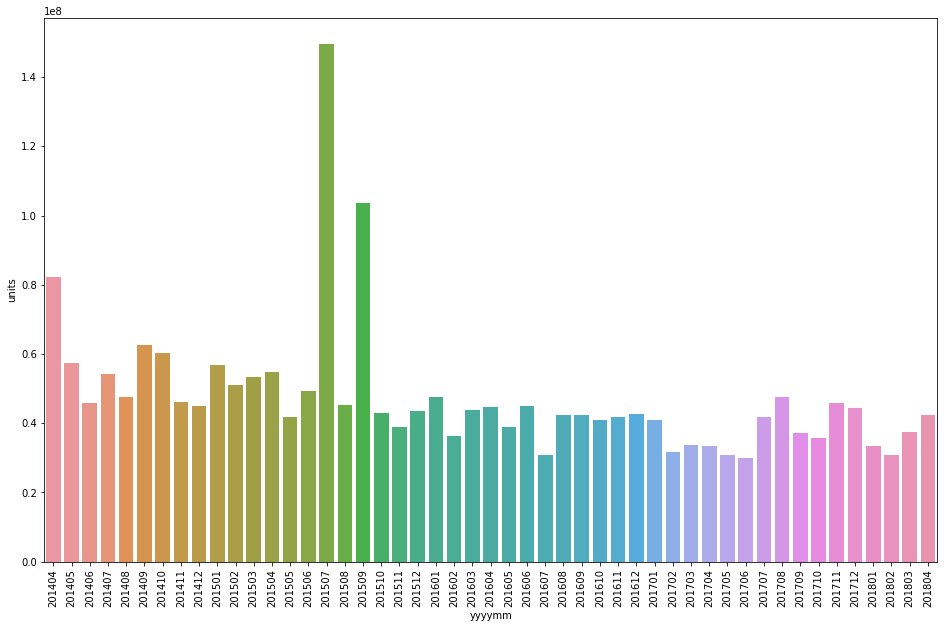

In [197]:
year_month_group = big_sales[big_sales['distributor'] == big_distributor].groupby('yyyymm')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='yyyymm', y='units', data=year_month_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We can see some months that are particularly high in terms of sales, but in general we can see a tendency of that category of product is decreasing a little bit with time

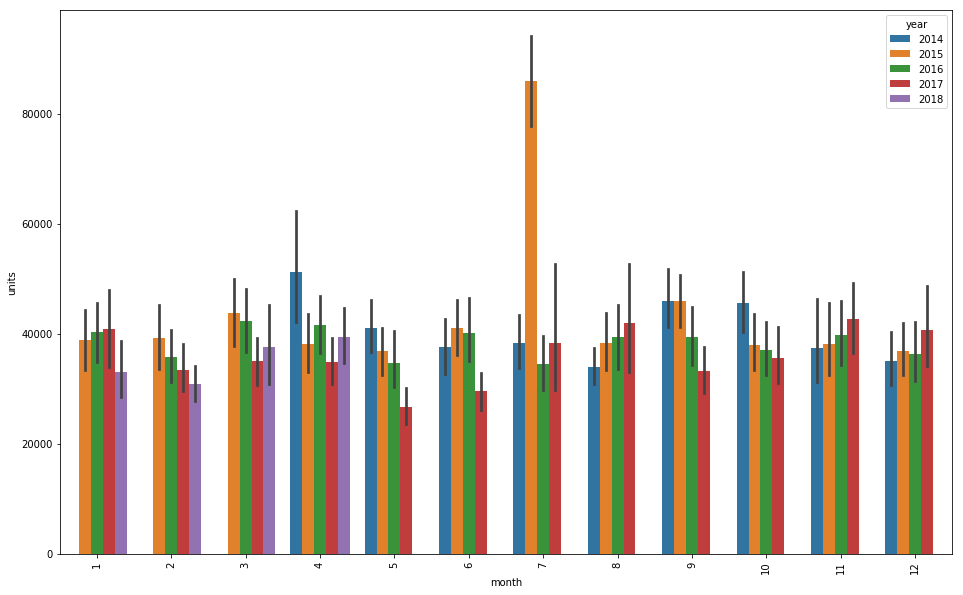

In [199]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='month', y='units', hue='year', data=big_sales[big_sales['distributor'] == big_distributor])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## What are the offices that produces the biggest sales?

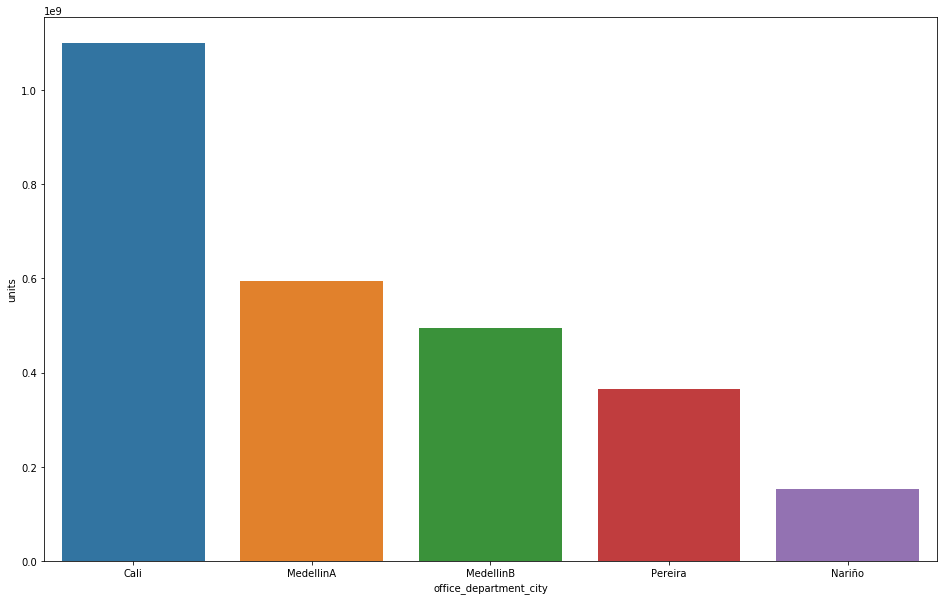

In [203]:
office_sales = category_df.groupby('office_department_city')['units'].sum().reset_index().sort_values('units', ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x='office_department_city', y='units', data=office_sales)

Cali is the office that produces more sales.

## How is the cali sales in time?

In [205]:
cali_df = category_df[category_df['office_department_city'] == 'Cali']

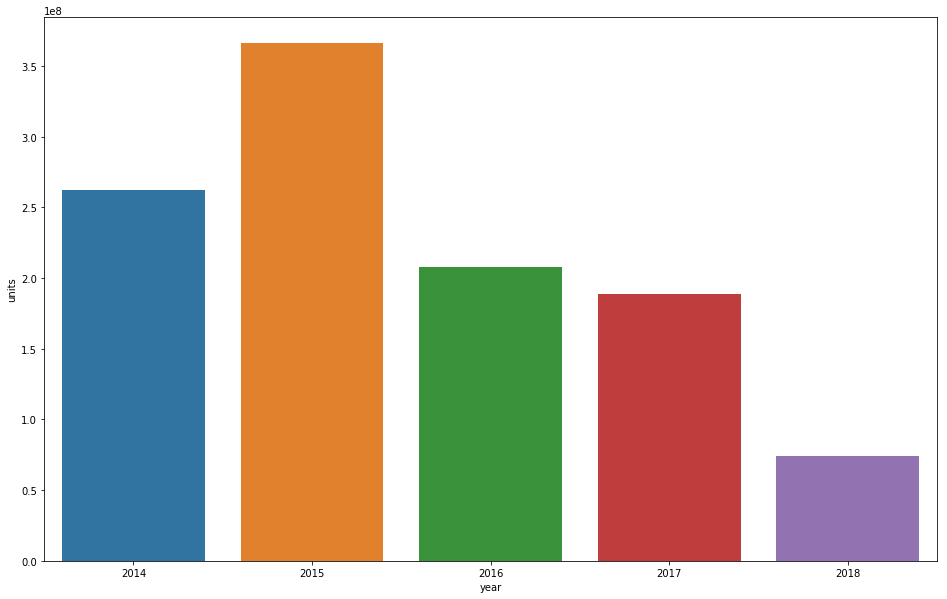

In [206]:
cali_group = cali_df.groupby('year')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(x='year', y='units', data=cali_group)

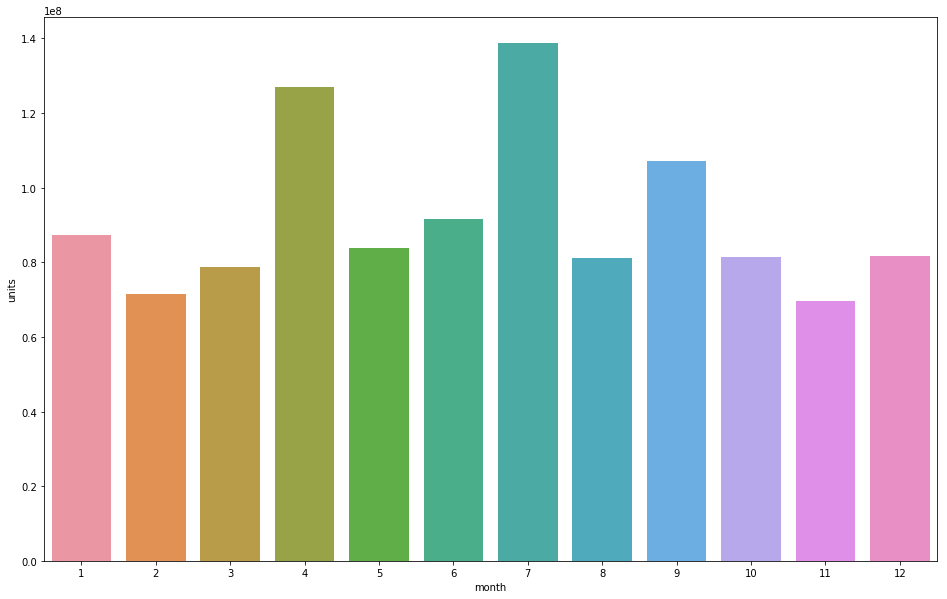

In [207]:
cali_group = cali_df.groupby('month')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(x='month', y='units', data=cali_group)

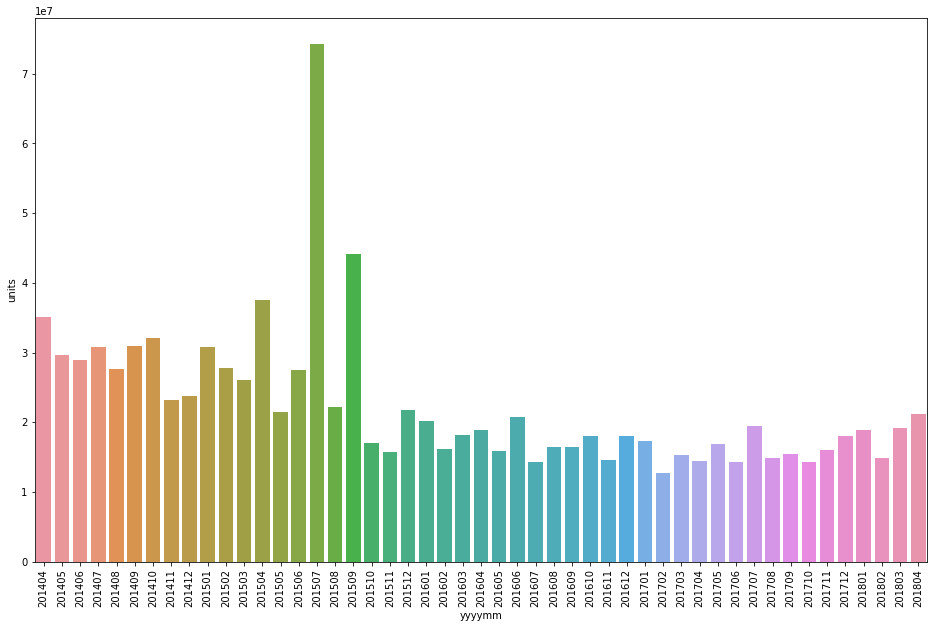

In [209]:
cali_group = cali_df.groupby('yyyymm')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='yyyymm', y='units', data=cali_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Flavors?

In [210]:
category_df['flavor_name'].unique()

array(['MAYONESA', 'LIMON', 'POLLO', 'NATURAL', 'VARIOS', 'SURTIDO',
       'OTROS'], dtype=object)

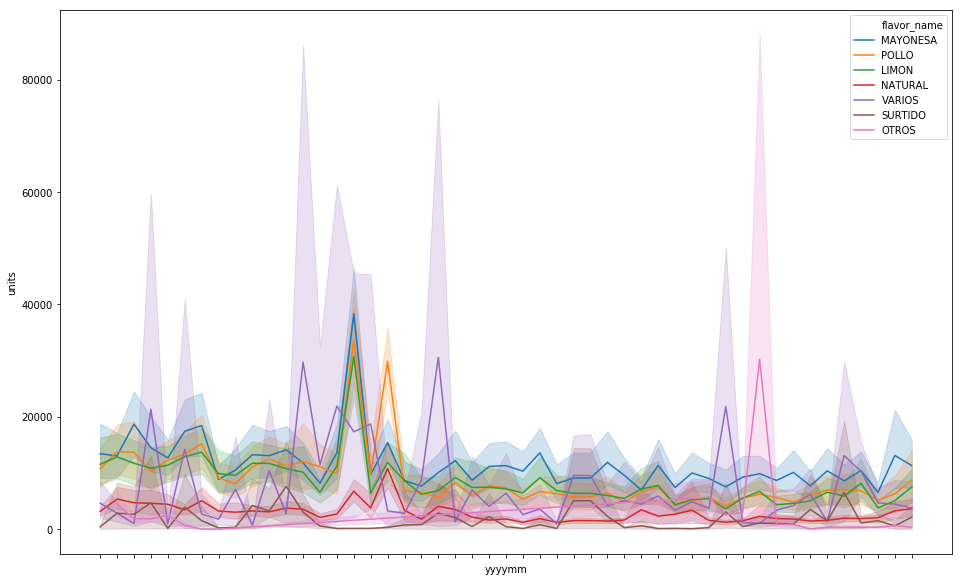

In [217]:
plt.figure(figsize=(16, 10))
ax = sns.lineplot(x='yyyymm', y='units', hue='flavor_name', data=cali_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## How can I add the distributor variable in this analysis?

## What are the warehouses that dispatch most sales for cali?

In [220]:
cali_df.groupby('warehouse_city')['units'].sum().reset_index().sort_values('units', ascending=False)

,warehouse_city,units
3,NORTE,404310583
8,TULUA,258562934
4,PALMIRA,210958473
0,BUGA,132724310
7,SUR,92901586
6,POPAYAN,7200
5,PEREIRA,900
1,CARTAGENA,0
2,ESPECIALES,0


## How are the Norte warehouse dispatches through time?

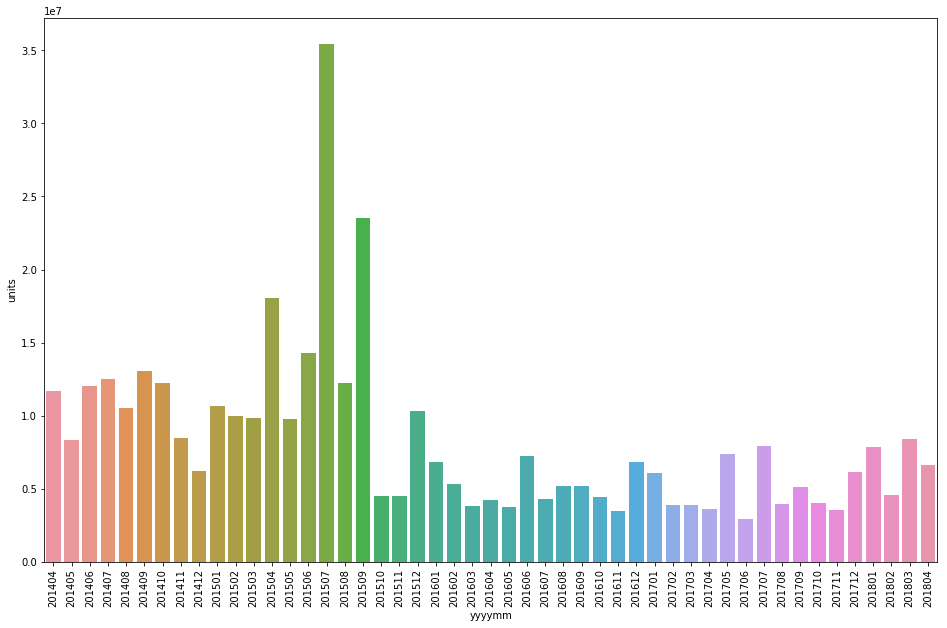

In [233]:
warehouse_group = cali_df[cali_df['warehouse_city'] == 'NORTE'].groupby('yyyymm')['units'].sum().reset_index()

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='yyyymm', y='units', data=warehouse_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()